# Small Image Classification Using Convolutional Neural Network (CNN)


[Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [44]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [7]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

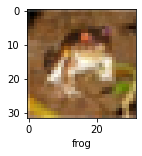

In [8]:
plot_sample(X_train,y_train,0)

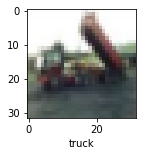

In [28]:
plot_sample(X_train,y_train,2)

Normalize the images to a number from 0 to 1.

In [10]:
X_train=X_train/255
X_test=X_test/255

Build simple artificial neural network for image classification

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9274 - accuracy: 0.3092
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6427 - accuracy: 0.4172
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5537 - accuracy: 0.4515
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4932 - accuracy: 0.4718
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4342 - accuracy: 0.4962


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.65      0.54      1000
           1       0.63      0.53      0.57      1000
           2       0.38      0.37      0.38      1000
           3       0.32      0.37      0.34      1000
           4       0.55      0.23      0.33      1000
           5       0.38      0.43      0.40      1000
           6       0.54      0.51      0.52      1000
           7       0.77      0.31      0.44      1000
           8       0.65      0.57      0.61      1000
           9       0.40      0.72      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



Now let us build a convolutional neural network to train our images

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.7977 - accuracy: 0.3363
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1884 - accuracy: 0.5771
Epoch 3/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0089 - accuracy: 0.6466
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8997 - accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8125 - accuracy: 0.7159
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7514 - accuracy: 0.7408
Epoch 7/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7027 - accuracy: 0.7519
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6632 - accuracy: 0.7706
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6162 - accuracy: 0.7855
Epoch 10/10
1563/1563 [==============================] - 26s 17m

In [36]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.8577 - accuracy: 0.7175


[0.8576758503913879, 0.7174999713897705]

In [37]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.05532624e-03, 5.06157987e-04, 1.23119280e-02, 8.56368840e-01,
        9.49379930e-04, 1.15392901e-01, 5.06147882e-03, 2.98091036e-04,
        6.98953168e-03, 6.65053012e-05],
       [3.97131225e-04, 1.58938654e-02, 1.36321120e-07, 1.50307301e-07,
        2.41727705e-09, 3.84742238e-09, 1.10027486e-07, 1.57419233e-08,
        9.78729546e-01, 4.97902092e-03],
       [9.82411429e-02, 6.77482858e-02, 8.07078672e-04, 1.58507202e-03,
        7.92196661e-05, 2.96142262e-05, 5.04678930e-04, 5.93457444e-05,
        7.73790181e-01, 5.71553968e-02],
       [9.91568983e-01, 6.05414668e-03, 4.08290478e-04, 2.20274978e-05,
        4.34033544e-04, 7.98627639e-07, 1.70694530e-05, 1.16648198e-06,
        9.11187381e-04, 5.82241046e-04],
       [1.05891708e-07, 1.82330259e-05, 1.76484429e-03, 3.14582116e-03,
        2.11935908e-01, 9.35641001e-05, 7.83040822e-01, 4.22275747e-07,
        3.05951716e-07, 1.83122886e-08]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [39]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

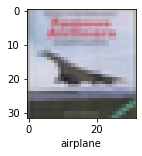

In [40]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,3)

In [37]:
classes[y_classes[3]]

'airplane'